# Animation
All (or most of) the changes in scatter and quiver plots are (linearly) interpolated. On top top that, scatter plots and quiver plots can take a sequence of arrays (the first dimension), where only one array is visualized. Together this can make smooth animations with coarse timesteps. Lets see an example.

In [1]:
import ipyvolume.pylab as p3
import numpy as np

## Basic animation

In [2]:
# only x is a sequence of arrays
x = np.array([[-1, -0.8], [1, -0.1], [0., 0.5]])
y = np.array([0.0, 0.0])
z = np.array([0.0, 0.0])
p3.figure()
s = p3.scatter(x, y, z)
p3.xyzlim(-1, 1)
p3.animation_control(s) # shows controls for animation controls
p3.show()

A Jupyter Widget

You can control which array to visualize, using the `scatter.sequence_index` property. Actually, the `pylab.animate_glyphs` is connecting the `Slider` and `Play` button to that property, but you can also set it from Python.

In [3]:
s.sequence_index = 1

## Animating color and size
We now demonstrate that you can also animate color and size

In [4]:
# create 2d grids: x, y, and r 
u = np.linspace(-10, 10, 25)
x, y = np.meshgrid(u, u)
r = np.sqrt(x**2+y**2)
print("x,y and z are of shape", x.shape)
# and turn them into 1d
x = x.flatten()
y = y.flatten()
r = r.flatten()
print("and flattened of shape", x.shape)

x,y and z are of shape (25, 25)
and flattened of shape (625,)


Now we only animate the z component

In [5]:
# create a sequence of 15 time elements
time = np.linspace(0, np.pi*2, 15)
z = np.array([(np.cos(r + t) * np.exp(-r/5)) for t in time])
print("z is of shape", z.shape)

z is of shape (15, 625)


In [6]:
# draw the scatter plot, and add controls with animate_glyphs
p3.figure()
s = p3.scatter(x, z, y, marker="sphere")
p3.animation_control(s, interval=200)
p3.ylim(-3,3)
p3.show()

A Jupyter Widget

In [7]:
# Now also include, color, which containts rgb values
color = np.array([[np.cos(r + t), 1-np.abs(z[i]), 0.1+z[i]*0] for i, t in enumerate(time)])
size = (z+1)
print("color is of shape", color.shape)

color is of shape (15, 3, 625)


color is of the wrong shape, the last dimension should contain the rgb value, i.e. the shape of should be (15, 2500, 3)

In [8]:
color = np.transpose(color, (0, 2, 1)) # flip the last axes

In [9]:
p3.figure()
s = p3.scatter(x, z, y, color=color, size=size, marker="sphere")
p3.animation_control(s, interval=200)
p3.ylim(-3,3)
p3.show()

A Jupyter Widget

We now make a movie, with a 2 second duration, where we rotate the camera, and change the size of the scatter points. 

In [10]:
def set_view(figure, framenr, fraction):
    p3.view(fraction*360, (fraction - 0.5) * 180)
    s.size = size * (1+0.5*np.sin(fraction * 6 * np.pi))
p3.movie('wave.gif', set_view, fps=20, frames=40)

A Jupyter Widget


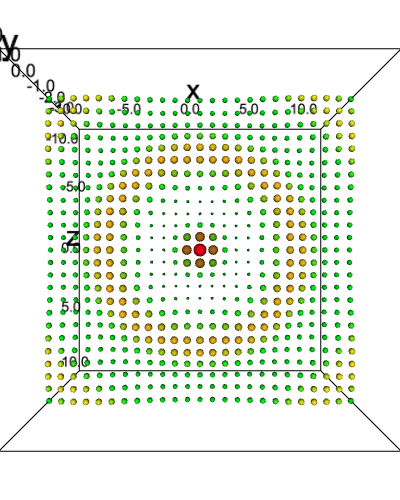

In [11]:
# include the gif with base64 encoding
import IPython.display
import base64
with open('wave.gif', 'rb') as gif:
    url = b"data:image/gif;base64," +base64.b64encode(gif.read())
IPython.display.Image(url=url.decode('ascii'))

## Animated quiver
Not only scatter plots can be animated, quiver as well, so the direction vector (vx, vy, vz) can also be animated, as shown in the example below, which is a (subsample of) a simulation of a small galaxy orbiting a host galaxy (not visible).

In [12]:
import ipyvolume.datasets
stream = ipyvolume.datasets.animated_stream.fetch()
print("shape of steam data", stream.data.shape) # first dimension contains x, y, z, vx, vy, vz, then time, then particle

shape of steam data (6, 200, 1250)


In [13]:
fig = p3.figure()
# instead of doing x=stream.data[0], y=stream.data[1], ... vz=stream.data[5], use *stream.data
# limit to 50 timesteps to avoid having a huge notebook
q = p3.quiver(*stream.data[:,0:50,:200], color="red", size=7)
p3.style.use("dark") # looks better
p3.animation_control(q, interval=200)
p3.show()

A Jupyter Widget

In [ ]:
fig.animation = 0 # set to 0 for no interpolation